### Questions
- polynomial vs sigmoid kernels
- rbf (radial basis function) is a goto...why? see it more often and says it in the lab and lesson

### Objectives
YWBAT
* compare and contrast the various methods for SVMs
* implement SVMs using sklearn
* use model analysis to tailor SVM

### Outline
- Introduce dataset
- Go through various svm models and their use case
- Tweak SVMs to suit the problem

### What do SVMs do?
SVMs (Support Vector Machines) are machine learning models that divide data by using 'support vectors' to create decision boundaries. 

The sensitivity (or lack thereof) of your boundaries depends on you. 

Low Sensitivity boundaries are often wide
High Sensitivity boundaries are very narrow

### When? Why?

SVMs are great to use anytime you want decisions to be made by using boundaries.  One example is finding points that are closest to the boundary and then using those points in your training set.  Boundaries are very helpful for classification, but also helpful for finding training points. 

Build a model
- classify new points and evaluate our classification
- if points weren't classified correctly we took their distance from the mislabeled class boundary 
- add those points to our training set

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles,  make_blobs, make_moons
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
def plot_groups(x, y):
    plt.figure(figsize=(8, 8))
    plt.grid(linestyle='dashed')
    color_dict = {0: 'g', 1: 'purple'}
    colors = ['g' if l == 0 else 'purple' for l in y]
    plt.scatter(x[:, 0], x[:, 1], c=colors, s=60, alpha=0.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    

def plot_groups3(x, y):
    plt.figure(figsize=(8, 8))
    plt.grid(linestyle='dashed')
    color_dict = {0: 'g', 1: 'purple', 2: 'yellow'}
    colors = [color_dict[l] for l in y]
    plt.scatter(x[:, 0], x[:, 1], c=colors, alpha=0.5, s=60)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    

    
def plot_svm_groups(x, y, clf):
    plt.figure(figsize=(8, 5))
    plt.grid()
    plot_decision_regions(x, y, clf, colors='green,purple,yellow', scatter_kwargs={"s": 100, "alpha": 0.5})
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("SVM Decision Boundary")
    plt.show()
    

def print_report(ytrain, ytest, ytrain_pred, ytest_pred):
    report = classification_report(ytrain, ytrain_pred)
    print("Train Scores\n" + "-"*50)
    print(report)
    accuracy = accuracy_score(ytrain, ytrain_pred)
    print(f"Train Accuracy: {accuracy}")
    report = classification_report(ytest, ytest_pred)
    print("Test Scores\n" + "-"*50)
    print(report)
    accuracy = accuracy_score(ytest, ytest_pred)
    print(f"Test Accuracy: {accuracy}")

## Linear SVM
![](images/svm-linear.png)

In [3]:
x, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=4.5)

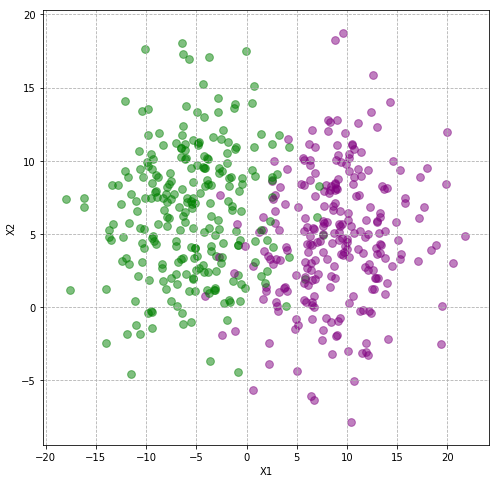

In [4]:
plot_groups(x, y)

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [6]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

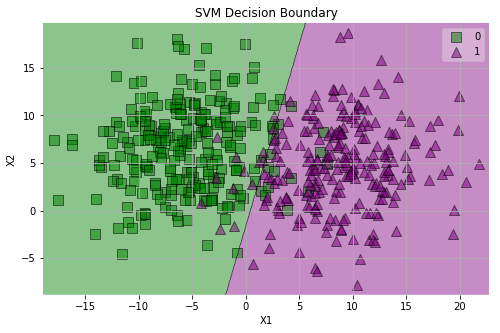

In [7]:
plot_svm_groups(x, y, clf)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


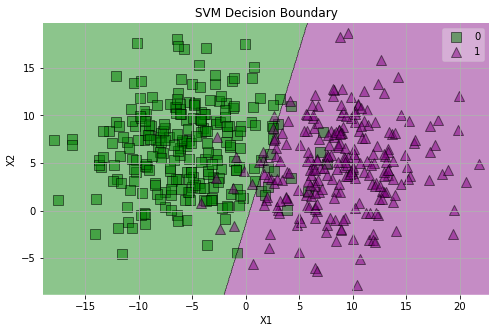

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       186
           1       0.93      0.95      0.94       189

    accuracy                           0.94       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.94      0.94      0.94       375

Train Accuracy: 0.9386666666666666
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.97      0.93      0.95        61

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125

Test Accuracy: 0.952


In [15]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


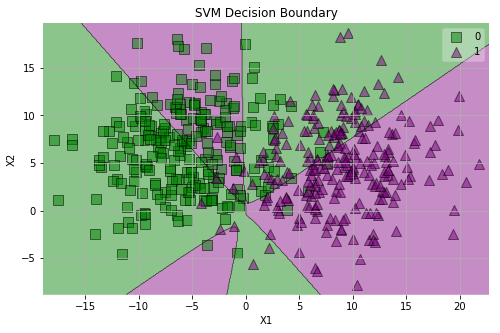

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       186
           1       0.65      0.65      0.65       189

    accuracy                           0.65       375
   macro avg       0.65      0.65      0.65       375
weighted avg       0.65      0.65      0.65       375

Train Accuracy: 0.6506666666666666
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.62      0.62        64
           1       0.59      0.57      0.58        61

    accuracy                           0.60       125
   macro avg       0.60      0.60      0.60       125
weighted avg       0.60      0.60      0.60       125

Test Accuracy: 0.6


In [9]:
clf = SVC(kernel='sigmoid')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


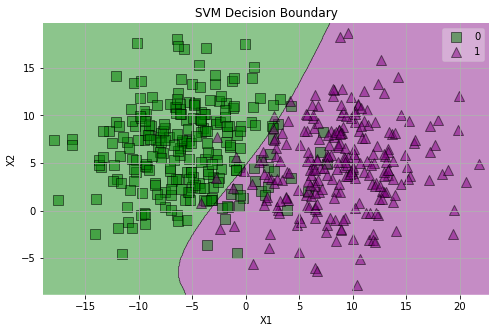

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       186
           1       0.89      0.98      0.93       189

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375

Train Accuracy: 0.9306666666666666
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.90      0.98      0.94        61

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125

Test Accuracy: 0.936


In [10]:
clf = SVC(kernel='poly')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### let's look at RBF (Radial Basis Function)
- most popular svm 
- project your data into a higher dimension and separate it there

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


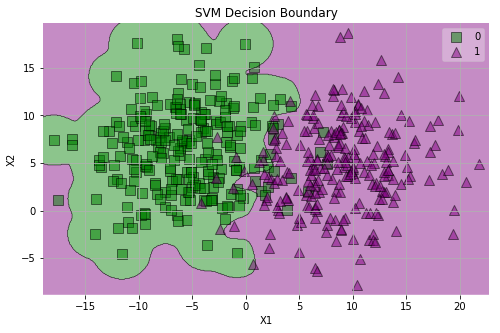

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       186
           1       0.94      0.96      0.95       189

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375

Train Accuracy: 0.9493333333333334
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        64
           1       0.92      0.90      0.91        61

    accuracy                           0.91       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.91      0.91      0.91       125

Test Accuracy: 0.912


In [11]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

In [12]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

In [13]:
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       186
           1       0.94      0.96      0.95       189

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375

Train Accuracy: 0.9493333333333334
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        64
           1       0.92      0.90      0.91        61

    accuracy                           0.91       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.91      0.91      0.91       125

Test Accuracy: 0.912


In [17]:
print(clf.coef_)
clf.decision_function([[-1, 0]])

[[ 0.19320401 -0.05268438]]


array([-0.27206569])

### Thoughts

- Training data is probably coming from the overlaps
- Testing data is probably from the outside of each group

## RBF SVM
![](images/svm-euc.png)

In [18]:
x, y = make_circles(n_samples=2000, shuffle=True, noise=0.05)

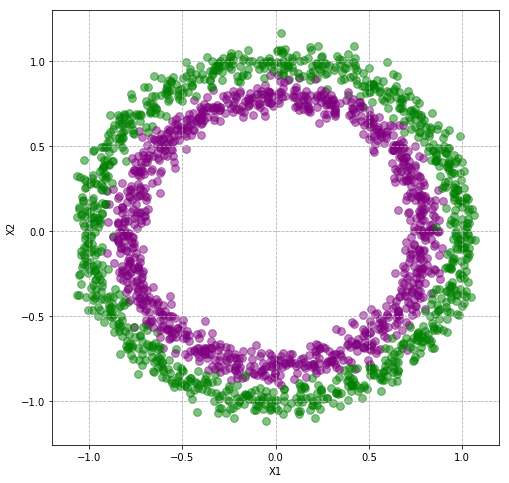

In [19]:
plot_groups(x, y)

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

### Linear SVM

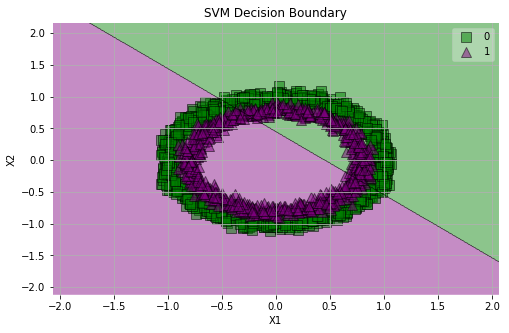

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.40      0.46       745
           1       0.53      0.65      0.58       755

    accuracy                           0.53      1500
   macro avg       0.53      0.53      0.52      1500
weighted avg       0.53      0.53      0.52      1500

Train Accuracy: 0.528
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.38      0.43       255
           1       0.48      0.59      0.53       245

    accuracy                           0.48       500
   macro avg       0.48      0.48      0.48       500
weighted avg       0.48      0.48      0.48       500

Test Accuracy: 0.482


In [24]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### RBF

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


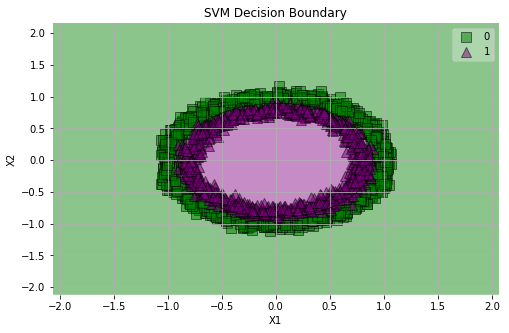

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       745
           1       0.98      0.97      0.98       755

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500

Train Accuracy: 0.9773333333333334
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       255
           1       0.97      0.97      0.97       245

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

Test Accuracy: 0.97


In [25]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Thoughts
- When do use this? 
- When the boundary isn't linear, when you cannot separate the data in the current dimensions. 

## Sigmoidal SVM

In [26]:
x, y = make_moons(n_samples=2000, noise=0.10)

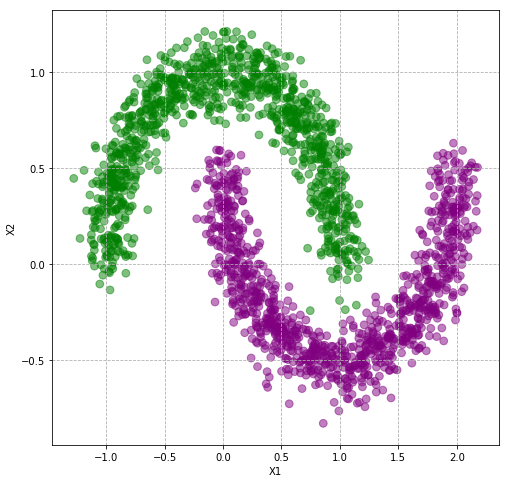

In [32]:
plot_groups(x, y)

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


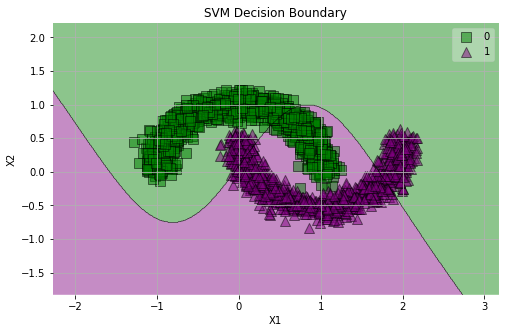

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       742
           1       0.68      0.69      0.69       758

    accuracy                           0.68      1500
   macro avg       0.68      0.68      0.68      1500
weighted avg       0.68      0.68      0.68      1500

Train Accuracy: 0.6813333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       258
           1       0.66      0.67      0.66       242

    accuracy                           0.67       500
   macro avg       0.67      0.67      0.67       500
weighted avg       0.67      0.67      0.67       500

Test Accuracy: 0.67


In [34]:
clf = SVC(kernel='sigmoid')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### RBF

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


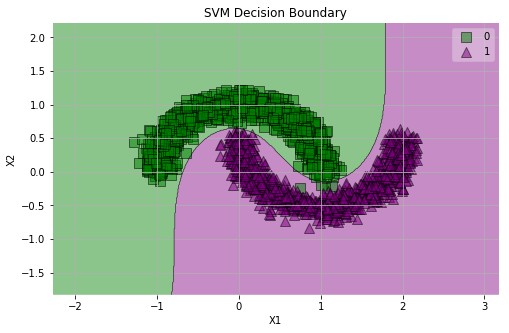

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       758

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Train Accuracy: 0.9986666666666667
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       258
           1       0.99      1.00      1.00       242

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Test Accuracy: 0.996


In [35]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Linear

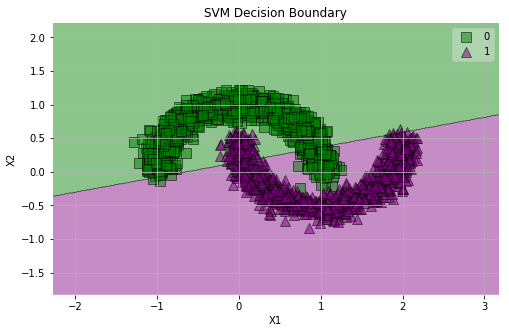

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       742
           1       0.88      0.88      0.88       758

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500

Train Accuracy: 0.878
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       258
           1       0.88      0.90      0.89       242

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

Test Accuracy: 0.89


In [36]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

## Polynomial SVM

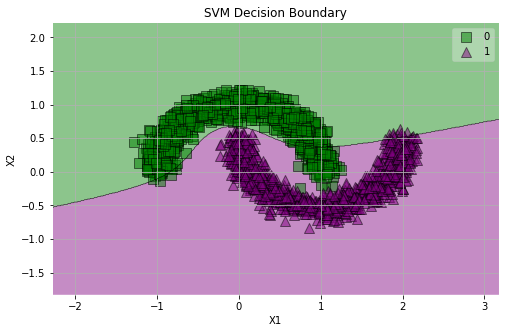

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       742
           1       0.88      0.99      0.93       758

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500

Train Accuracy: 0.9273333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       258
           1       0.88      0.98      0.93       242

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

Test Accuracy: 0.928


In [42]:
clf = SVC(kernel='poly', degree=3, gamma='auto')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

###  Thoughts?

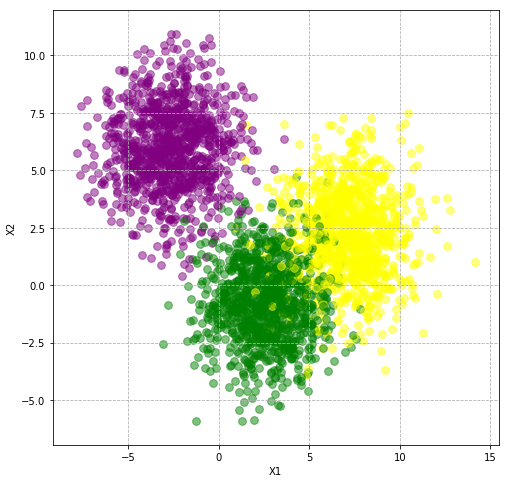

In [43]:
x, y = make_blobs(n_samples=3000, n_features=2, centers=3, cluster_std=1.8)
plot_groups3(x, y)

## Let's try all types of SVMs

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

### Linear

In [ ]:
clf = SVC(kernel='poly', degree=1)
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Polynomial (3)

In [ ]:
clf = SVC(kernel='poly', degree=3)
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### RBF

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Sigmoidal

In [ ]:
clf = SVC(kernel='sigmoid')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Assessment